# Level One Analyses

Code from [Towards Data Science](https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9)

Other resources:
[Applied Time Series Analysis](https://nwfsc-timeseries.github.io/atsa-labs/sec-tslab-correlation-within-and-among-time-series.html)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import os
import glob
from sklearn.preprocessing import MinMaxScaler
from wearables import fitcosinor
from wearables import npmetrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.style.use('seaborn-white')
plt.rcParams["image.cmap"] = "Set1"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)

data_dir = '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/Summer 2021/data/'
results_dir = '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/Summer 2021/results/'

In [2]:
n_days = 7
interpolate = True
recording_period_min = [7]

cr_measures = ['actmin', 'amp', 'alpha', 'beta', 'phi']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in cr_measures]

np_measures = ['IS', 'IV', 'RA', 'L5_start', 'L5', 'M10_start', 'M10']
np_cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in np_measures]

In [3]:
cols.append('subject')
cols.append('device')
cols

['actmin_7', 'amp_7', 'alpha_7', 'beta_7', 'phi_7', 'subject', 'device']

In [4]:
def readact_raw(in_file):
    with open(in_file) as f:
        for i, l in enumerate(f):
            if ' Epoch-by-Epoch Data ' in l:
                try:
                    data = pd.read_csv(
                        in_file, skiprows=i + 11)
                   
                except:
                    try:
                        data = pd.read_csv(
                            in_file, skiprows=i + 12)
                        print('successfully read Actiware data file')
                    except:
                        print('unable to read Actiware data file')
    return data

Organized fitbit files by subject

```bash

for subject in `ls /Volumes/schnyer/Megan/Wearables/data/raw/fitbit/`; do

    echo " scp /Volumes/schnyer/Megan/Wearables_old/data/fitbit/WA_${subject}_* /Volumes/schnyer/Megan/Wearables/data/raw/fitbit/${subject}/. "
    scp /Volumes/schnyer/Megan/Wearables_old/data/fitbit/WA_${subject}_* /Volumes/schnyer/Megan/Wearables/data/raw/fitbit/${subject}/.
done
```

In [5]:
act_files = sorted(glob.glob(data_dir + 'raw/actiwatch/*New_Analysis.csv'))
fit_files = sorted(glob.glob(data_dir + 'raw/fitbit/*/WA_*minuteStepsNarrow*.csv'))
hr_files = sorted(glob.glob(data_dir + 'raw/fitbit/*/WA_*heartrate_1min*.csv'))

print('%.f actiwatch files, %.f fitbit files, %.f hr files' % (len(act_files), len(fit_files), len(hr_files)))

52 actiwatch files, 51 fitbit files, 50 hr files


In [25]:
(hr['Value'].diff(5) == 0).sum()/len(hr['Value'])

0.08801544786346081

Subject 10011
recording period is 13 days 23:27:00
new recording period is 7 days 00:00:00
missing 11.44 percent
Correlation for raw ts: 0.31
Correlation for normalized ts: 0.31
r active 0.61, r rest -0.01, r sleep -0.04


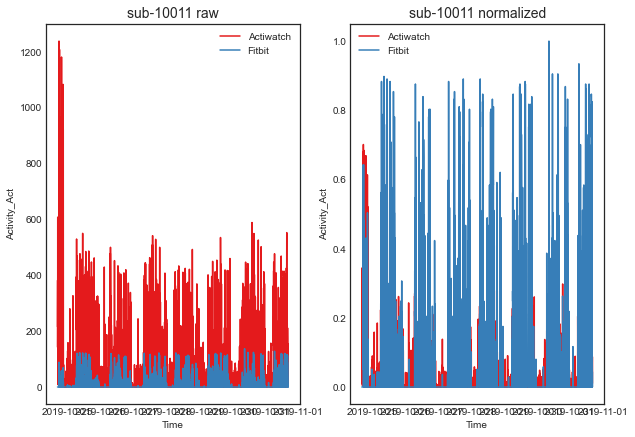

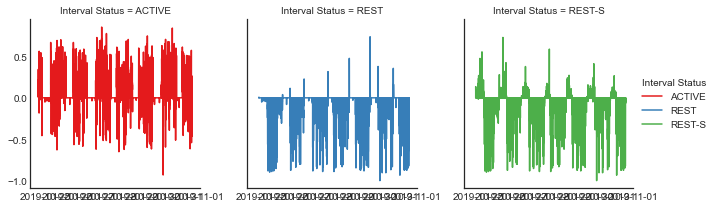





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.119639  0.631789  6.941031  6.008405  12.489618



calculating cr measures for fitbit data
     actmin       amp     alpha     beta        phi
0  0.085566  0.621676  6.958278  6.04174  12.502249



Subject 10012
recording period is 6 days 15:56:00
new recording period is 7 days 00:00:00
missing 10.60 percent
Correlation for raw ts: 0.41
Correlation for normalized ts: 0.41
r active 0.76, r rest -0.02, r sleep -0.04


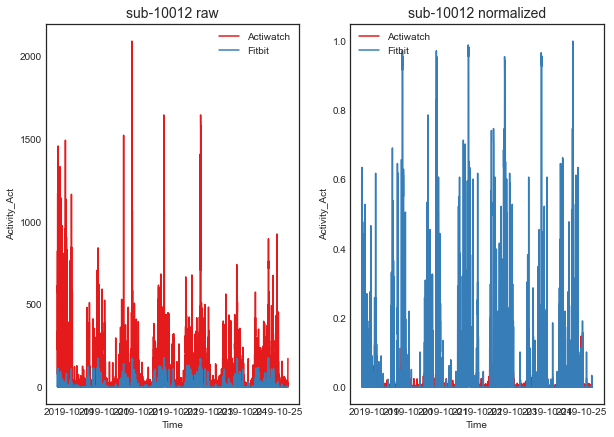

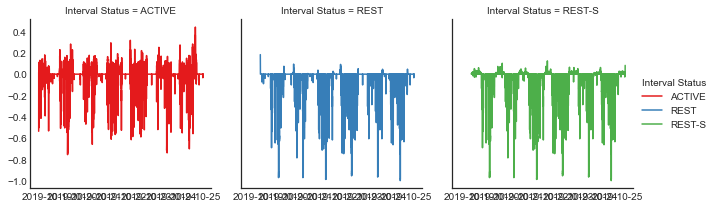





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta       phi
0  0.045242  0.584838  6.922122  5.973979  12.56128



calculating cr measures for fitbit data
     actmin       amp    alpha      beta        phi
0  0.074178  0.598329  6.90932  5.956696  13.216577



Subject 10014
recording period is 6 days 15:23:00
new recording period is 7 days 00:00:00
missing 13.87 percent
Correlation for raw ts: 0.30
Correlation for normalized ts: 0.30
r active 0.60, r rest -0.00, r sleep -0.02


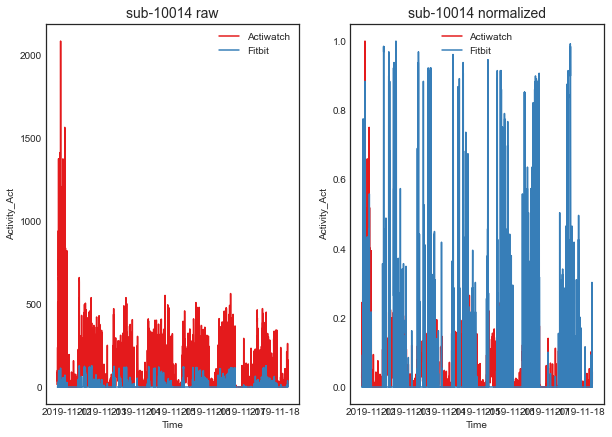

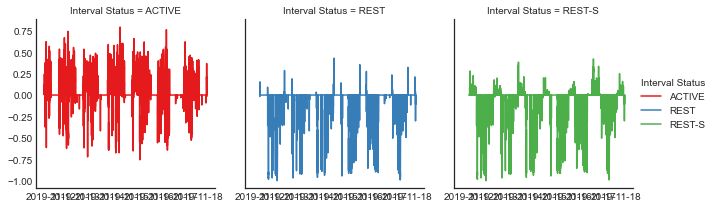





calculating cr measures for actiwatch data
     actmin      amp     alpha      beta        phi
0  0.098918  0.61658  6.928062  5.989491  12.810061



calculating cr measures for fitbit data
    actmin       amp     alpha      beta        phi
0  0.07662  0.604754  6.931347  5.985179  13.183611



Subject 10016
recording period is 8 days 05:41:00
new recording period is 7 days 00:00:00
missing 9.08 percent
Correlation for raw ts: 0.39
Correlation for normalized ts: 0.39
r active 0.75, r rest -0.02, r sleep -0.03


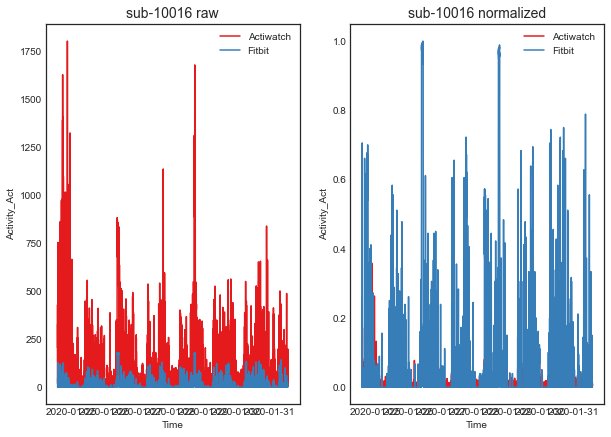

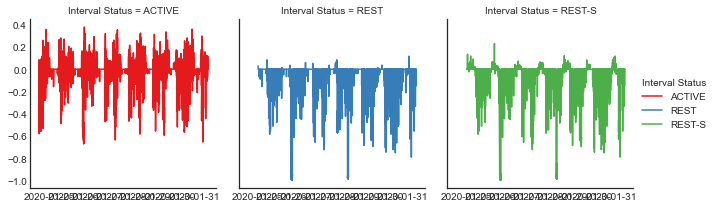





calculating cr measures for actiwatch data
    actmin       amp     alpha      beta        phi
0  0.06108  0.596171  6.937518  5.993387  12.131284



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.077278  0.610647  6.956235  6.020787  11.993785



Subject 10023
recording period is 13 days 00:29:00
new recording period is 7 days 00:00:00
missing 8.80 percent
Correlation for raw ts: 0.33
Correlation for normalized ts: 0.33
r active 0.63, r rest -0.01, r sleep -0.03


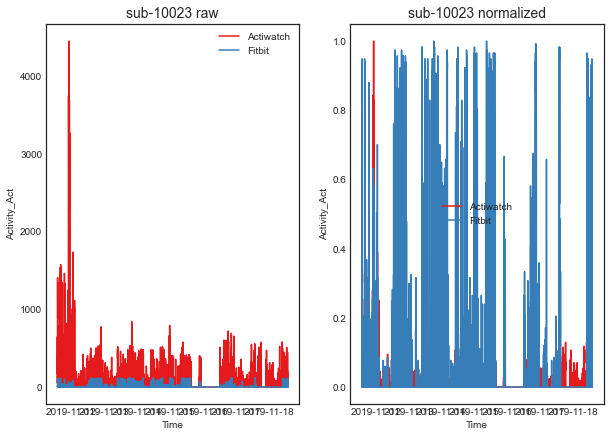

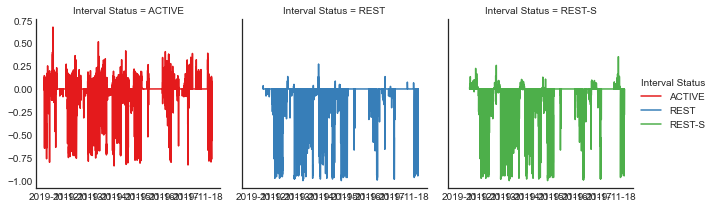





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.065678  0.590902  6.909754  5.957397  12.411471



calculating cr measures for fitbit data
     actmin       amp     alpha      beta       phi
0  0.106759  0.614339  6.902186  5.955366  12.97697



Subject 10024
recording period is 13 days 17:32:00
new recording period is 7 days 00:00:00
missing 9.25 percent
Correlation for raw ts: 0.30
Correlation for normalized ts: 0.30
r active 0.55, r rest -0.02, r sleep -0.04


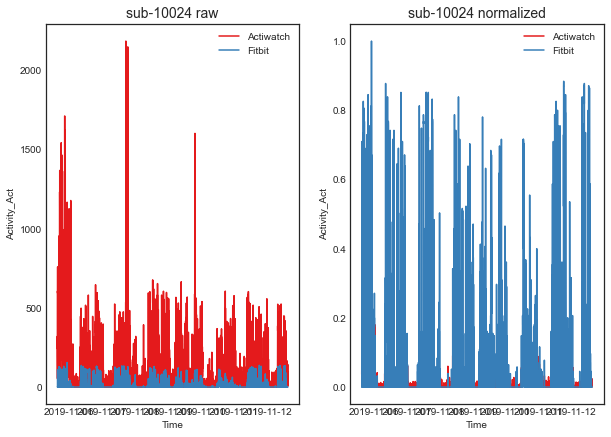

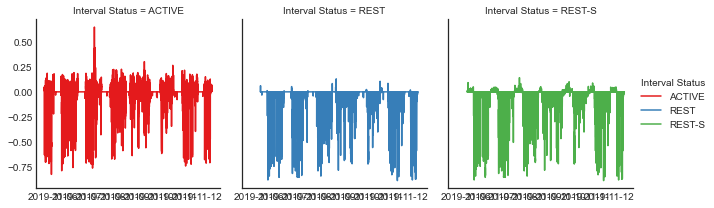





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.049811  0.588717  6.929639  5.984447  12.277811



calculating cr measures for fitbit data
     actmin      amp     alpha      beta        phi
0  0.089697  0.61564  6.931546  6.002002  12.940139



Subject 10025
recording period is 13 days 20:49:00
new recording period is 7 days 00:00:00
missing 7.14 percent
Correlation for raw ts: 0.33
Correlation for normalized ts: 0.33
r active 0.61, r rest -0.01, r sleep -0.05


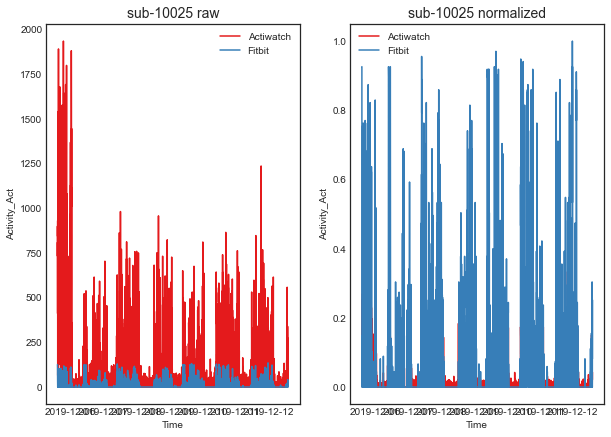

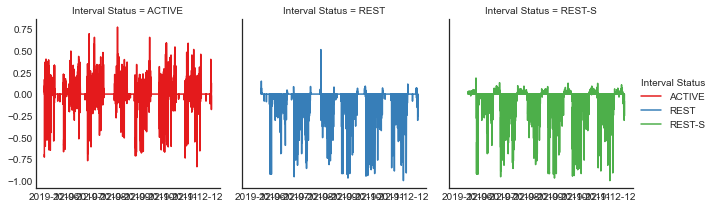





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.078769  0.598073  6.904966  5.954246  12.822286



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.083252  0.606805  6.919426  5.978431  13.021859



Subject 10033
recording period is 13 days 23:44:00
new recording period is 7 days 00:00:00
missing 11.38 percent
Correlation for raw ts: 0.31
Correlation for normalized ts: 0.31
r active 0.59, r rest 0.00, r sleep -0.04


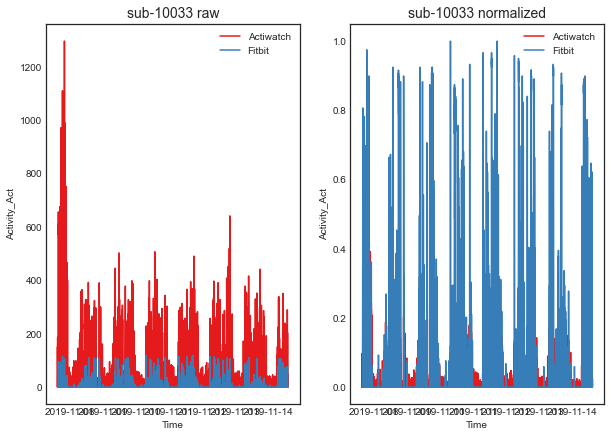

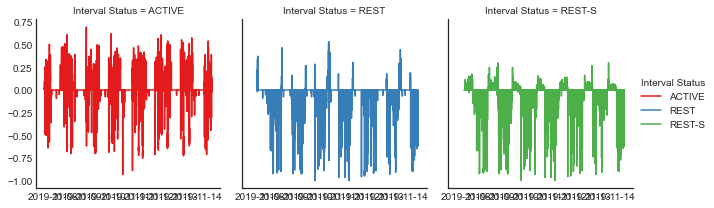





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.084855  0.613348  6.943494  6.010984  12.365271



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.081083  0.618001  6.956716  6.035541  12.511843



Subject 10035
recording period is 13 days 23:21:00
new recording period is 7 days 00:00:00
missing 10.28 percent
Correlation for raw ts: 0.25
Correlation for normalized ts: 0.25
r active 0.48, r rest -0.02, r sleep -0.03


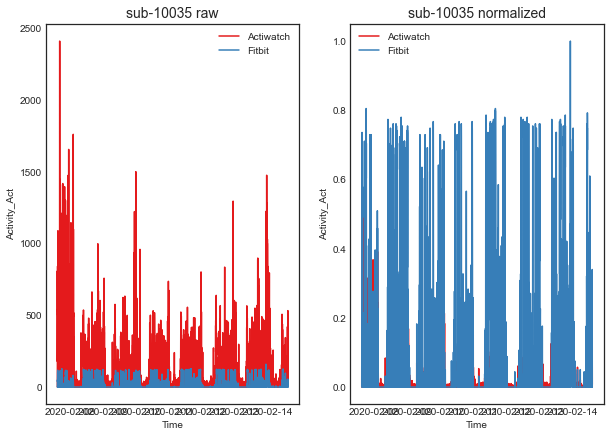

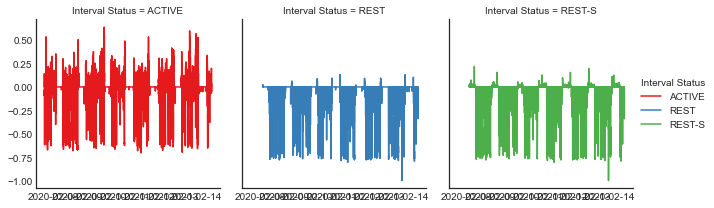





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.069949  0.591364  6.905243  5.950942  12.505931



calculating cr measures for fitbit data
     actmin       amp    alpha      beta        phi
0  0.101586  0.611034  6.90225  5.955079  13.078318



Subject 10038
recording period is 12 days 23:44:00
new recording period is 7 days 00:00:00
missing 10.88 percent
Correlation for raw ts: 0.32
Correlation for normalized ts: 0.32
r active 0.62, r rest -0.02, r sleep -0.04


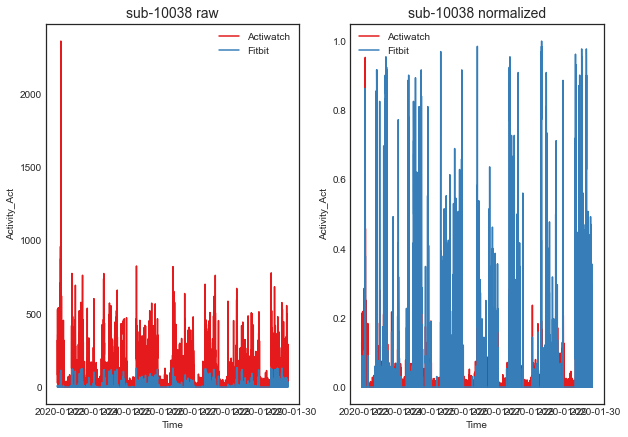

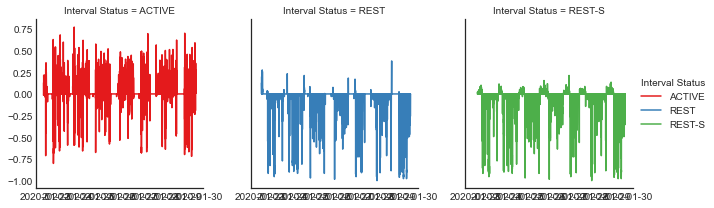





calculating cr measures for actiwatch data
     actmin       amp   alpha      beta        phi
0  0.099157  0.616831  6.9341  5.995693  12.152839



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.084099  0.618589  6.958397  6.036608  12.228871



Subject 10040
recording period is 13 days 23:30:00
new recording period is 7 days 00:00:00
missing 12.93 percent
Correlation for raw ts: 0.31
Correlation for normalized ts: 0.31
r active 0.54, r rest -0.03, r sleep -0.02


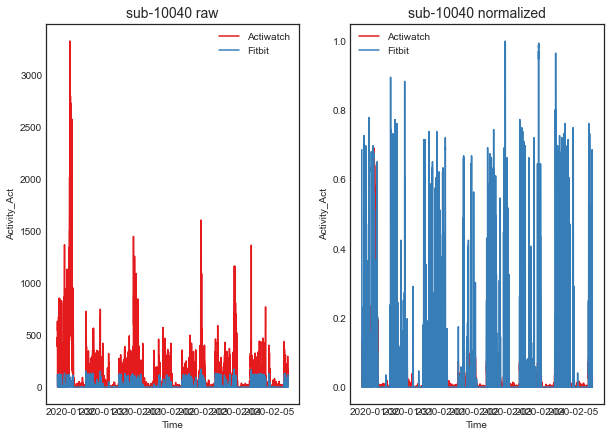

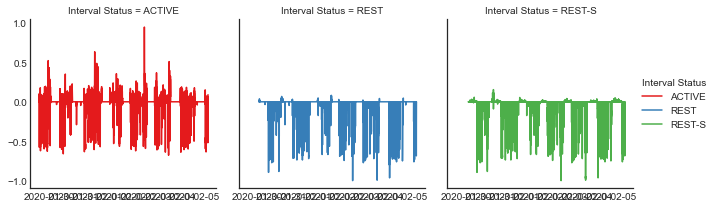





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.052543  0.582097  6.903792  5.948777  12.415005



calculating cr measures for fitbit data
     actmin       amp     alpha     beta      phi
0  0.076033  0.599902  6.910798  5.96893  12.7377



Subject 10045
unsupported operand type(s) for -: 'NoneType' and 'NoneType'
Subject 10049
recording period is 0 days 00:08:00
new recording period is 7 days 00:00:00
missing 0.00 percent
Correlation for raw ts: 0.98
Correlation for normalized ts: 0.98
not enough values to unpack (expected 3, got 1)
Subject 10062
recording period is 14 days 00:00:00
new recording period is 7 days 00:00:00
missing 9.48 percent
Correlation for raw ts: 0.32
Correlation for normalized ts: 0.32
r active 0.61, r rest 0.02, r sleep -0.01


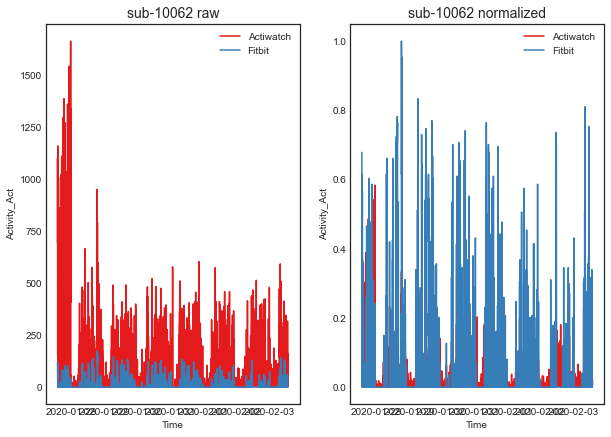

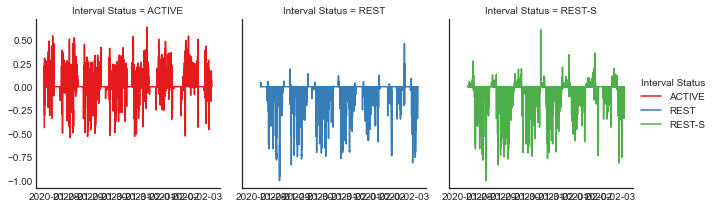





calculating cr measures for actiwatch data
     actmin       amp     alpha     beta        phi
0  0.080748  0.604529  6.928458  5.98387  12.347888



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.062973  0.604056  6.945711  6.017874  12.405261



Subject 10139
recording period is 12 days 23:55:00
new recording period is 7 days 00:00:00
missing 9.58 percent
Correlation for raw ts: 0.37
Correlation for normalized ts: 0.37
r active 0.68, r rest -0.01, r sleep 0.01


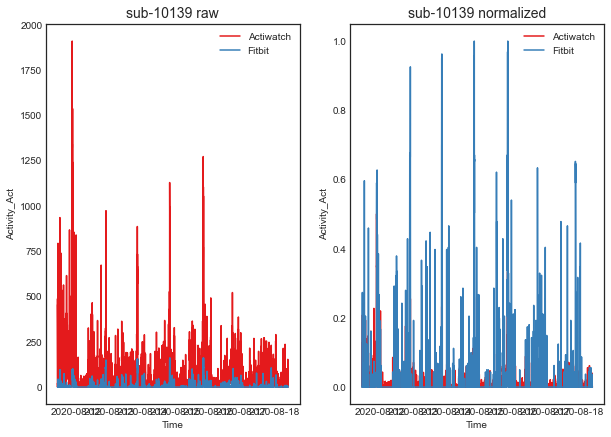

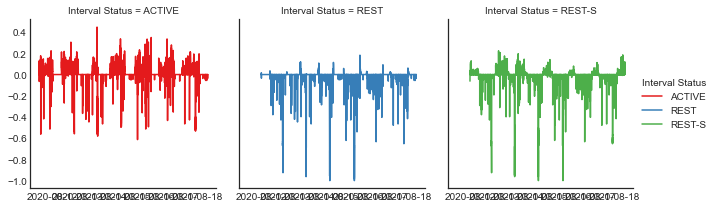





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.045329  0.582409  6.915212  5.964413  12.297824



calculating cr measures for fitbit data
    actmin       amp     alpha      beta        phi
0  0.03553  0.575094  6.906386  5.952107  12.321321



Subject 10140
recording period is 6 days 10:51:00
new recording period is 7 days 00:00:00
missing 9.86 percent
Correlation for raw ts: 0.30
Correlation for normalized ts: 0.30
r active 0.56, r rest 0.00, r sleep -0.03


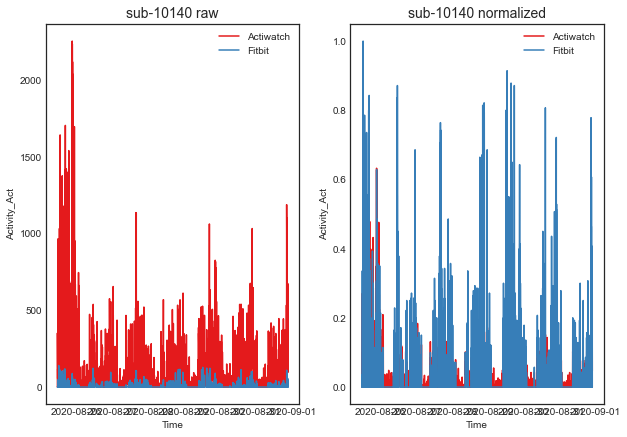

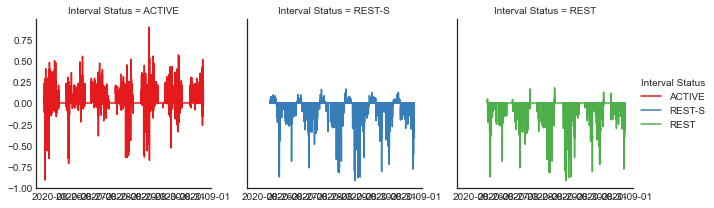





calculating cr measures for actiwatch data
     actmin       amp     alpha     beta        phi
0  0.071962  0.596532  6.911285  5.96382  12.766679



calculating cr measures for fitbit data
    actmin       amp     alpha      beta        phi
0  0.04547  0.588774  6.927191  5.988631  12.682161



Subject 10143
recording period is 11 days 02:07:00
new recording period is 7 days 00:00:00
missing 9.25 percent
Correlation for raw ts: 0.25
Correlation for normalized ts: 0.25
r active 0.50, r rest 0.00, r sleep -0.02


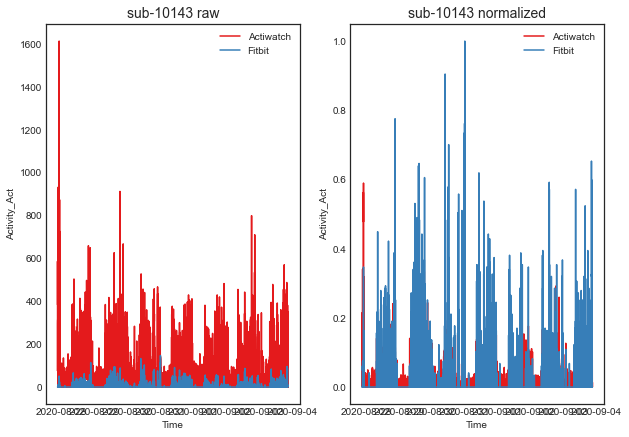

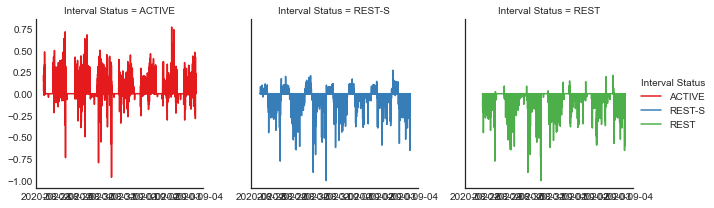





calculating cr measures for actiwatch data
    actmin       amp     alpha      beta        phi
0  0.07191  0.599583  6.924341  5.980631  12.523835



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.036877  0.587919  6.939153  6.006036  12.383247



Subject 10144
recording period is 11 days 13:53:00
new recording period is 7 days 00:00:00
missing 11.71 percent
Correlation for raw ts: 0.28
Correlation for normalized ts: 0.28
r active 0.57, r rest -0.02, r sleep -0.04


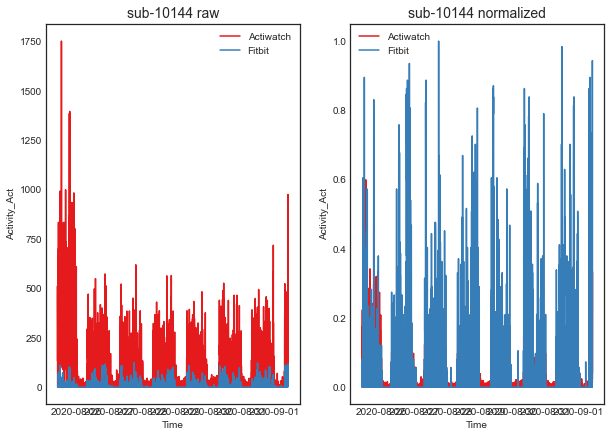

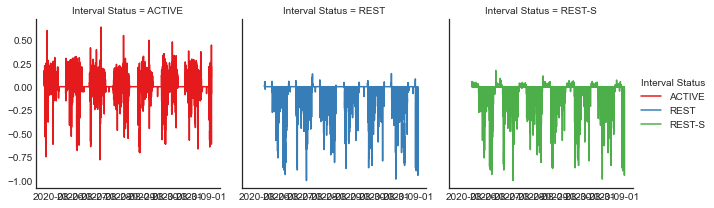





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.065548  0.602703  6.940379  6.008587  12.262813



calculating cr measures for fitbit data
     actmin       amp     alpha      beta       phi
0  0.071377  0.604043  6.935855  6.000813  12.11594



Subject 10145
recording period is 11 days 07:29:00
new recording period is 7 days 00:00:00
missing 10.05 percent
Correlation for raw ts: 0.09
Correlation for normalized ts: 0.09
r active 0.10, r rest -0.02, r sleep -0.03


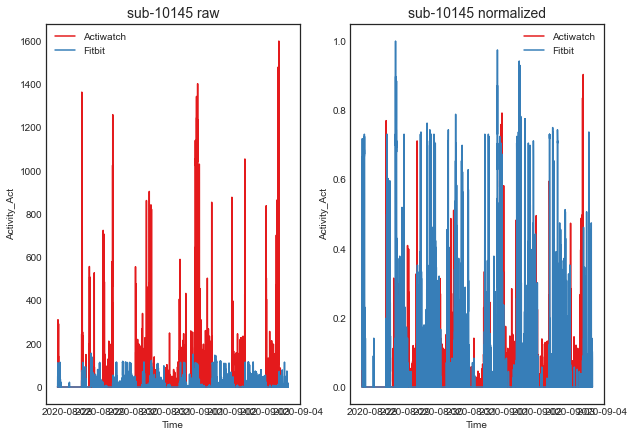

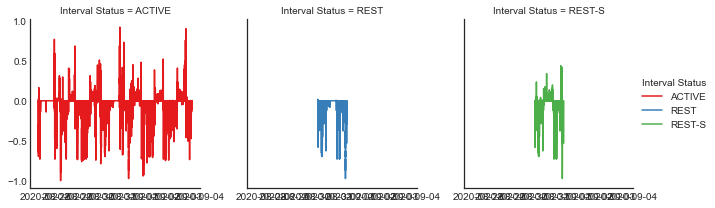





calculating cr measures for actiwatch data
     actmin       amp    alpha      beta        phi
0  0.035035  0.586554  6.93808  6.004612  11.654397



calculating cr measures for fitbit data
     actmin       amp     alpha      beta       phi
0  0.086498  0.611111  6.925968  5.990766  12.80967



Subject 10146
recording period is 4 days 12:28:00
new recording period is 7 days 00:00:00
missing 9.08 percent
Correlation for raw ts: 0.22
Correlation for normalized ts: 0.22
r active 0.40, r rest -0.01, r sleep -0.02


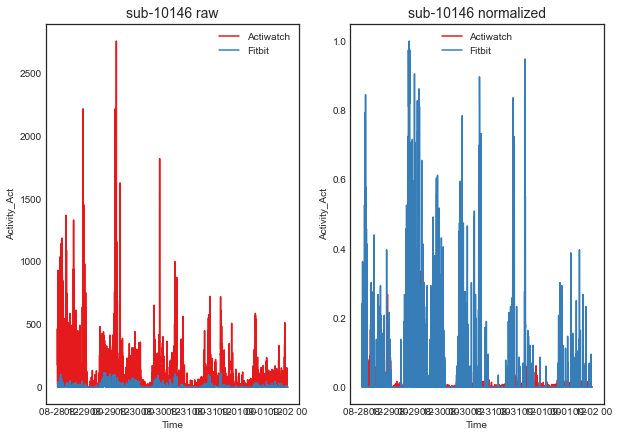

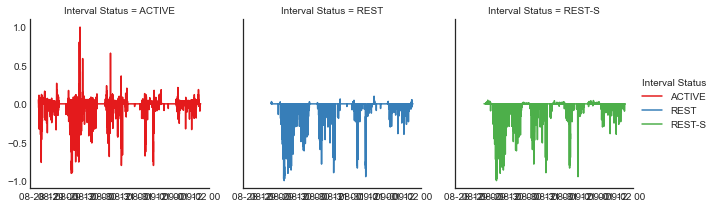





calculating cr measures for actiwatch data
     actmin       amp    alpha      beta        phi
0  0.024835  0.580972  6.94133  6.004023  12.201378



calculating cr measures for fitbit data
     actmin       amp     alpha      beta       phi
0  0.040322  0.596531  6.954127  6.034758  11.91492



Subject 10147
recording period is 11 days 12:44:00
new recording period is 7 days 00:00:00
missing 12.19 percent
Correlation for raw ts: 0.28
Correlation for normalized ts: 0.28
r active 0.52, r rest -0.00, r sleep -0.03


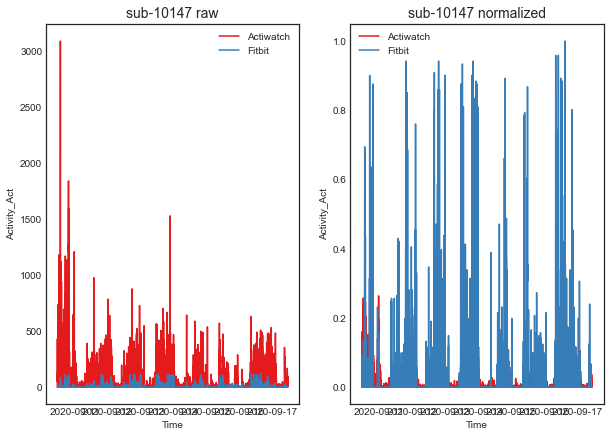

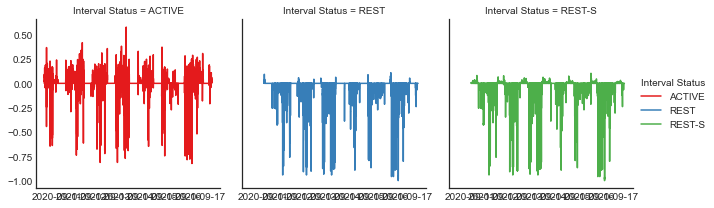





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.048175  0.587303  6.924063  5.980158  12.428594



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.046708  0.588258  6.925353  5.984945  12.522362



Subject 10148
recording period is 10 days 20:11:00
new recording period is 7 days 00:00:00
missing 8.17 percent
Correlation for raw ts: 0.40
Correlation for normalized ts: 0.40
r active 0.70, r rest 0.01, r sleep 0.02


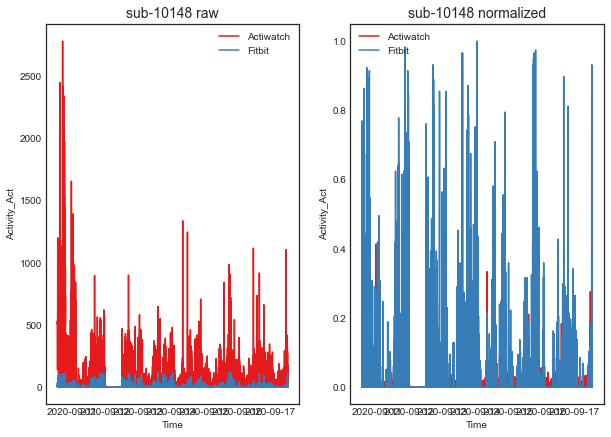

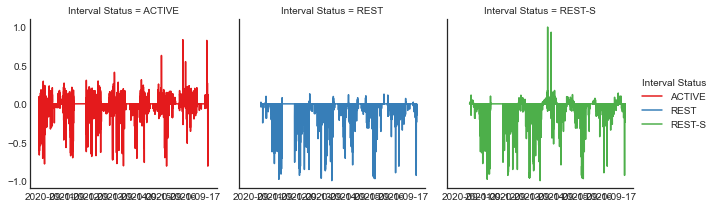





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.060775  0.591617  6.915361  5.966693  12.787644



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.075387  0.596631  6.890242  5.938429  13.457593



Subject 10149
recording period is 11 days 06:16:00
new recording period is 7 days 00:00:00
missing 12.94 percent
Correlation for raw ts: 0.31
Correlation for normalized ts: 0.31
r active 0.64, r rest -0.01, r sleep -0.03


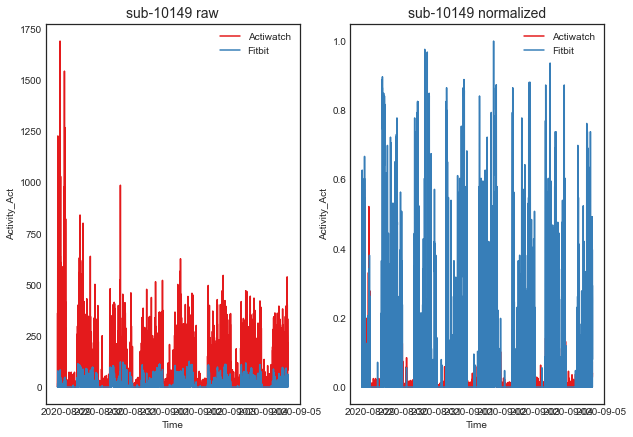

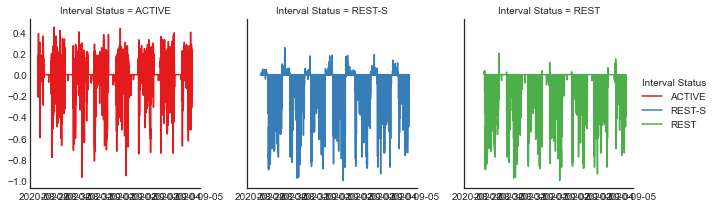





calculating cr measures for actiwatch data
     actmin       amp    alpha      beta        phi
0  0.073706  0.605971  6.94058  6.005698  12.236828



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.096518  0.615436  6.940896  5.997286  12.194555



Subject 10150
recording period is 11 days 00:28:00
new recording period is 7 days 00:00:00
missing 11.76 percent
Correlation for raw ts: 0.47
Correlation for normalized ts: 0.47
r active 0.79, r rest -0.01, r sleep -0.03


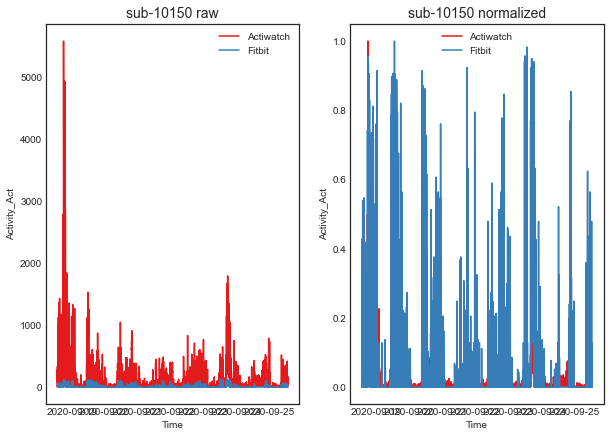

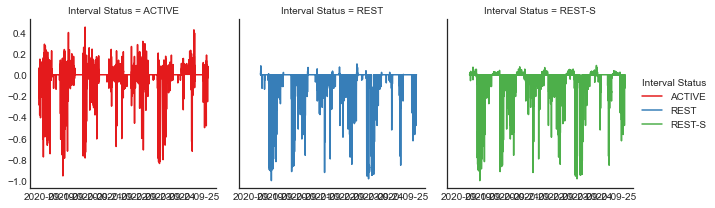





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.060067  0.595507  6.923519  5.983052  12.746029



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.078018  0.612707  6.927046  6.005088  13.049748



Subject 10152
recording period is 10 days 09:47:00
new recording period is 7 days 00:00:00
missing 1.20 percent
Correlation for raw ts: 0.33
Correlation for normalized ts: 0.33
r active 0.61, r rest 0.02, r sleep -0.03


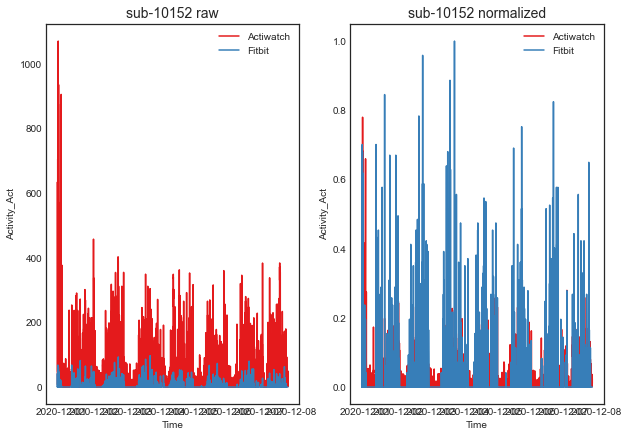

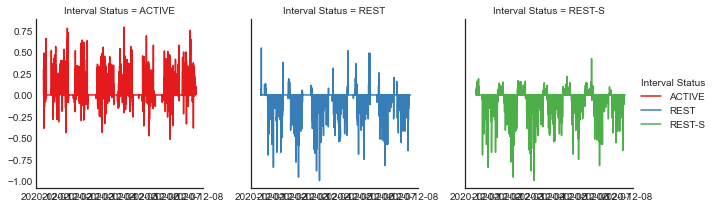





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.089392  0.606606  6.919941  5.972734  12.584282



calculating cr measures for fitbit data
     actmin       amp    alpha      beta        phi
0  0.038289  0.585543  6.93496  5.994356  12.419833



Subject 20076
list index out of range
Subject 20103
recording period is 13 days 23:18:00
new recording period is 7 days 00:00:00
missing 14.62 percent
Correlation for raw ts: 0.26
Correlation for normalized ts: 0.26
r active 0.51, r rest -0.02, r sleep -0.02


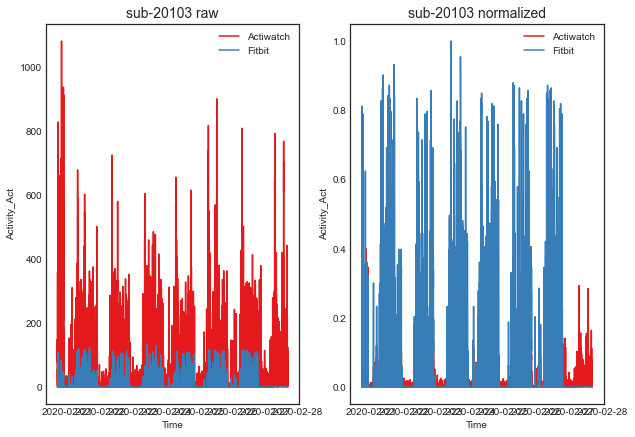

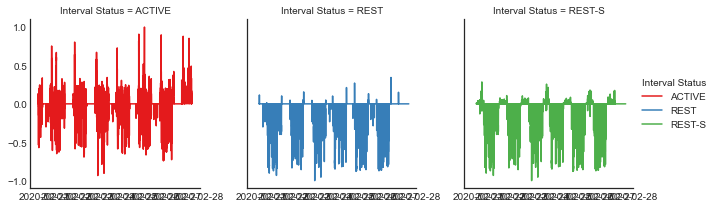





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.073187  0.608686  6.948416  6.018079  12.099114



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.090941  0.623243  6.958436  6.037151  12.537992



Subject 20105
recording period is 13 days 23:55:00
new recording period is 7 days 00:00:00
missing 14.60 percent
Correlation for raw ts: 0.32
Correlation for normalized ts: 0.32
r active 0.64, r rest -0.02, r sleep -0.03


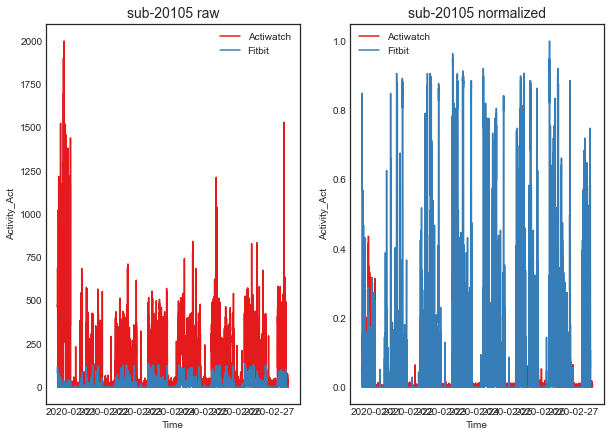

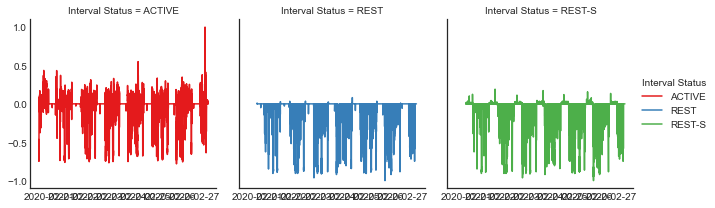





calculating cr measures for actiwatch data
   actmin       amp     alpha      beta        phi
0  0.0643  0.602096  6.945984  6.011082  12.019904



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.117591  0.643911  6.972299  6.062463  12.389553



Subject 20108
recording period is 13 days 22:07:00
new recording period is 7 days 00:00:00
missing 15.27 percent
Correlation for raw ts: 0.29
Correlation for normalized ts: 0.29
r active 0.52, r rest 0.04, r sleep 0.02


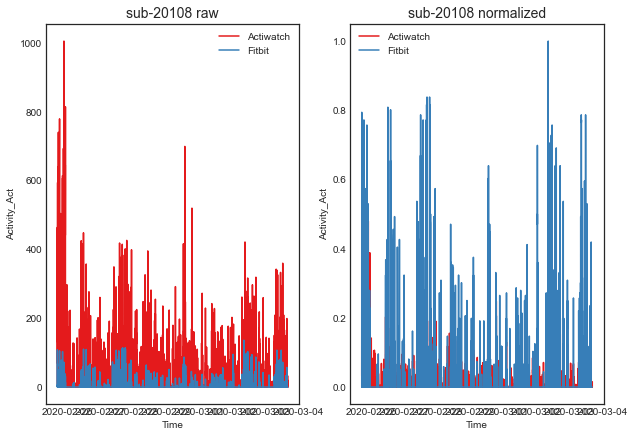

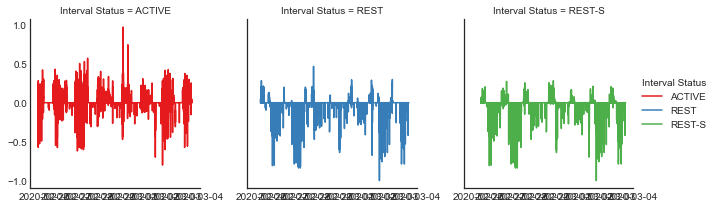





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.059778  0.598423  6.937532  6.003438  12.243228



calculating cr measures for fitbit data
     actmin       amp     alpha     beta       phi
0  0.042136  0.594438  6.948778  6.02291  12.31357



Subject 20113
recording period is 13 days 23:59:00
new recording period is 7 days 00:00:00
missing 13.72 percent
Correlation for raw ts: 0.31
Correlation for normalized ts: 0.31
r active 0.61, r rest -0.01, r sleep -0.02


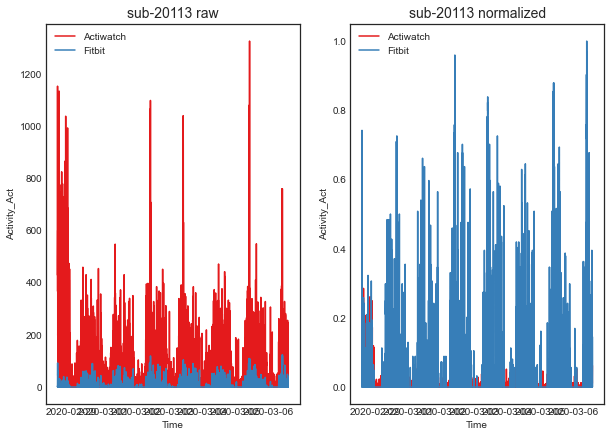

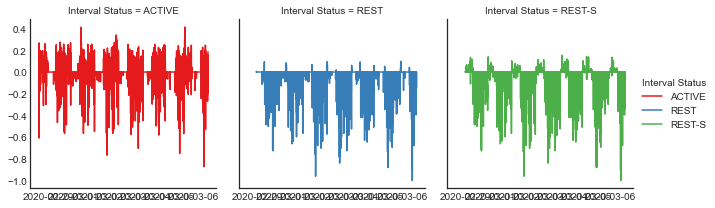





calculating cr measures for actiwatch data
    actmin       amp     alpha      beta        phi
0  0.04728  0.595121  6.948563  6.017249  12.033052



calculating cr measures for fitbit data
     actmin       amp     alpha     beta        phi
0  0.047904  0.600331  6.959017  6.03681  12.031369



Subject 20115
recording period is 13 days 23:43:00
new recording period is 7 days 00:00:00
missing 10.64 percent
Correlation for raw ts: 0.28
Correlation for normalized ts: 0.28
r active 0.54, r rest -0.01, r sleep -0.00


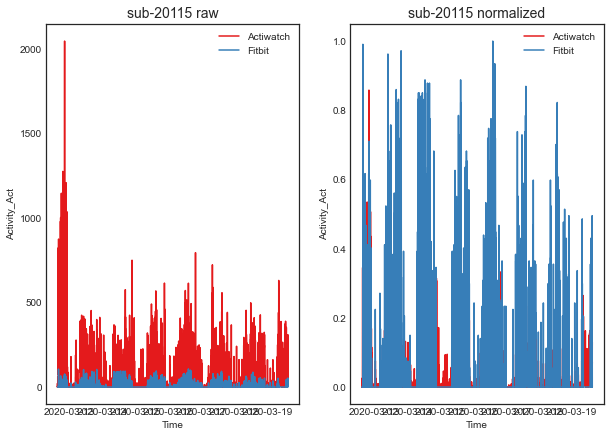

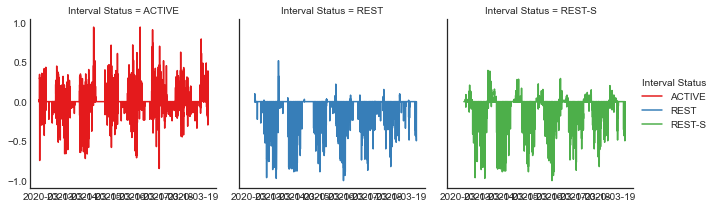





calculating cr measures for actiwatch data
     actmin       amp     alpha     beta        phi
0  0.079675  0.612876  6.946445  6.01937  12.417481



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.073359  0.617643  6.958851  6.047244  12.658101



Subject 20120
recording period is 10 days 21:18:00
new recording period is 7 days 00:00:00
missing 12.27 percent
Correlation for raw ts: 0.38
Correlation for normalized ts: 0.38
r active 0.71, r rest -0.01, r sleep -0.04


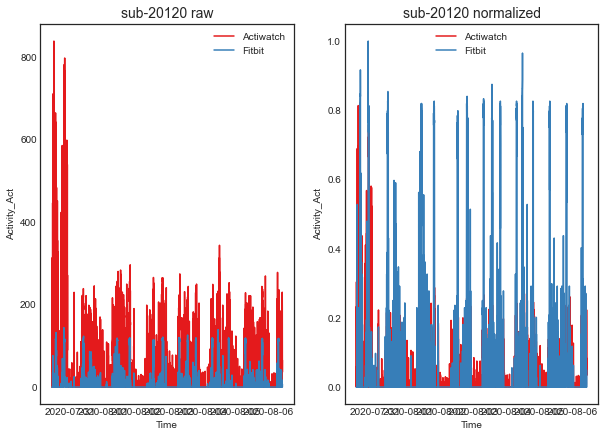

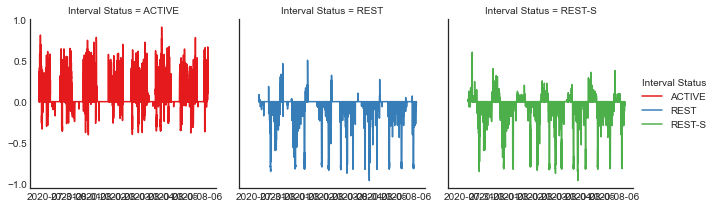





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.110245  0.633451  6.950395  6.033708  12.212807



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.073185  0.622229  6.959157  6.062207  11.750993



Subject 20122
recording period is 10 days 18:32:00
new recording period is 7 days 00:00:00
missing 10.75 percent
Correlation for raw ts: 0.29
Correlation for normalized ts: 0.29
r active 0.59, r rest 0.01, r sleep -0.03


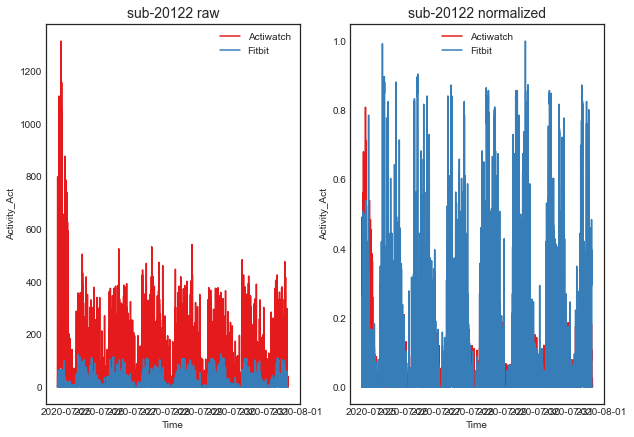

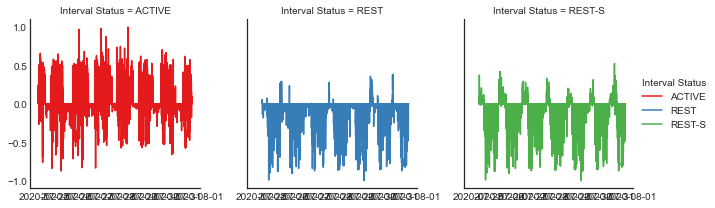





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.121346  0.633832  6.937893  6.010344  12.552564



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.104619  0.637824  6.961949  6.059746  12.088959



Subject 20123
recording period is 10 days 12:19:00
new recording period is 7 days 00:00:00
missing 14.37 percent
Correlation for raw ts: 0.35
Correlation for normalized ts: 0.35
r active 0.70, r rest -0.01, r sleep -0.05


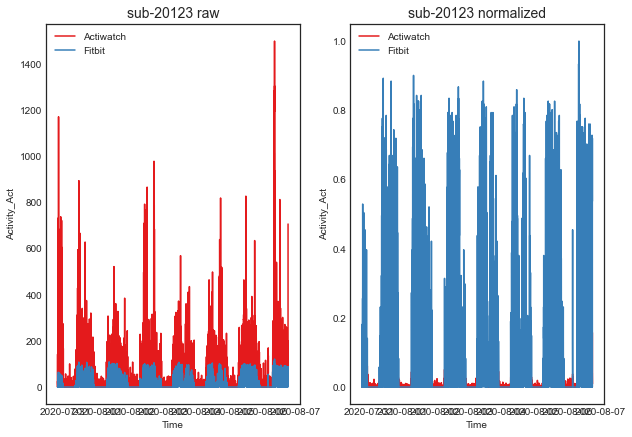

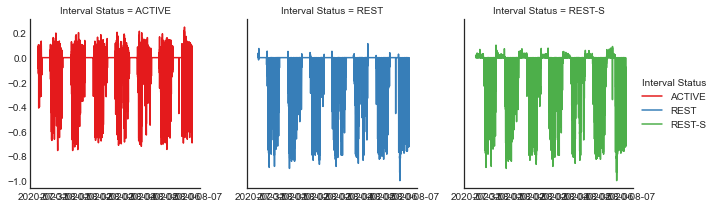





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.045667  0.596485  6.952713  6.025617  12.083609



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.105283  0.647335  6.979206  6.092477  12.393413



Subject 20124
recording period is 11 days 01:28:00
new recording period is 7 days 00:00:00
missing 10.32 percent
Correlation for raw ts: 0.25
Correlation for normalized ts: 0.25
r active 0.51, r rest -0.02, r sleep -0.05


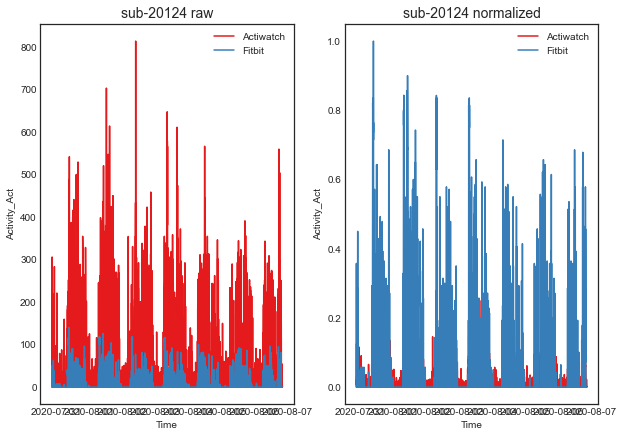

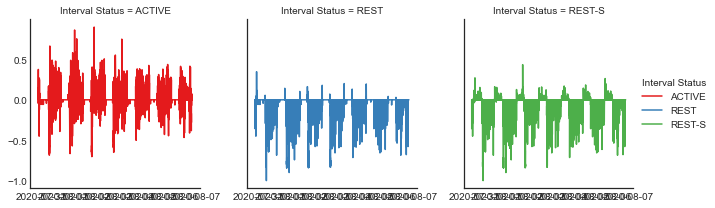





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.076483  0.613183  6.952023  6.028263  12.227919



calculating cr measures for fitbit data
     actmin       amp    alpha      beta        phi
0  0.070302  0.614951  6.96252  6.047233  11.588006



Subject 20125
recording period is 10 days 18:41:00
new recording period is 7 days 00:00:00
missing 10.72 percent
Correlation for raw ts: 0.40
Correlation for normalized ts: 0.40
r active 0.79, r rest -0.01, r sleep -0.05


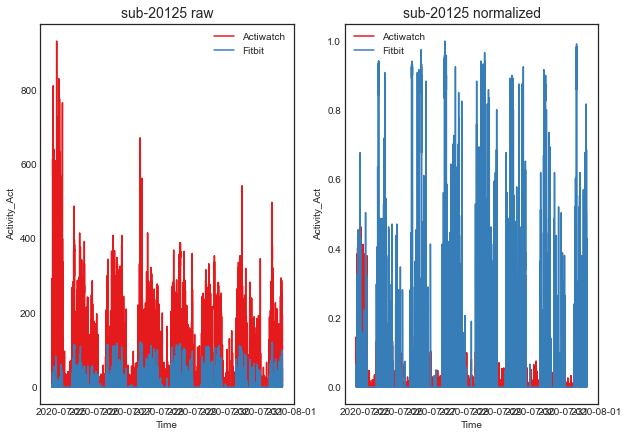

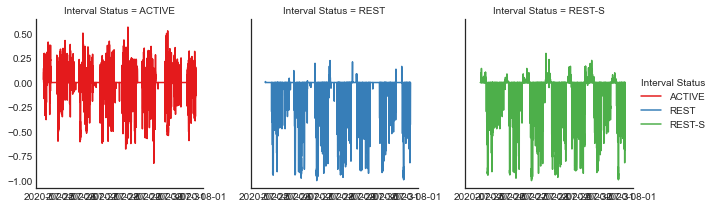





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.086173  0.613442  6.940309  6.008961  12.230044



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.099711  0.631673  6.958539  6.048082  12.222292



Subject 20127
recording period is 13 days 04:07:00
new recording period is 7 days 00:00:00
missing 15.13 percent
Correlation for raw ts: 0.39
Correlation for normalized ts: 0.39
r active 0.73, r rest 0.02, r sleep 0.03


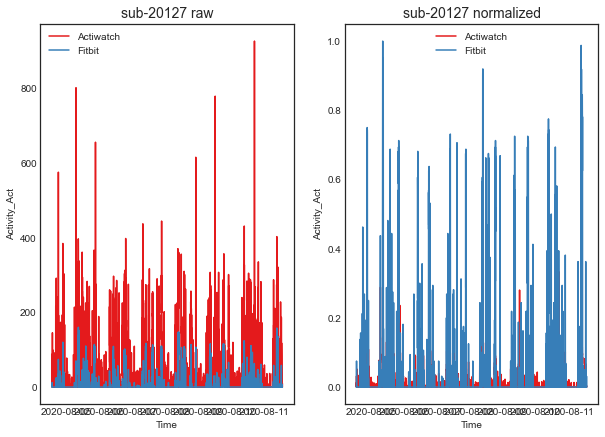

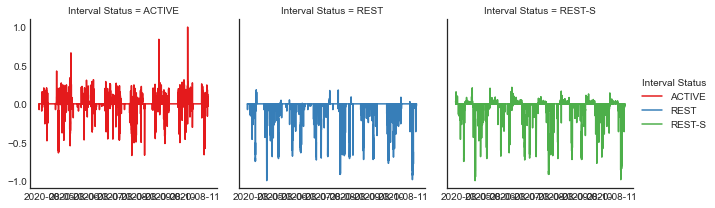





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.049221  0.593001  6.941945  6.004355  12.137819



calculating cr measures for fitbit data
     actmin       amp     alpha     beta        phi
0  0.055603  0.597191  6.947563  6.00961  11.958695



Subject 20129
You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat
Subject 20131
recording period is 11 days 18:49:00
new recording period is 7 days 00:00:00
missing 13.39 percent
Correlation for raw ts: 0.22
Correlation for normalized ts: 0.22
r active 0.45, r rest -0.00, r sleep -0.02


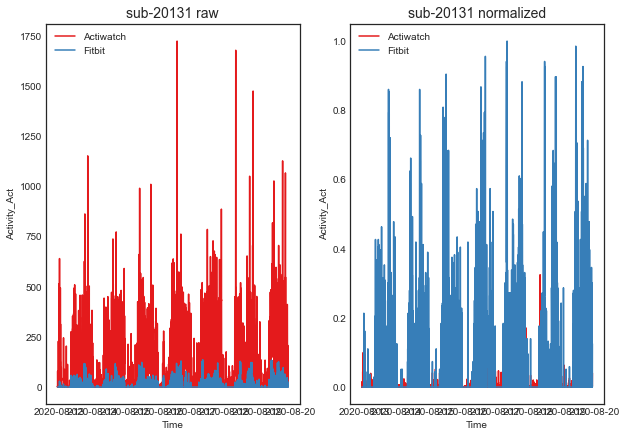

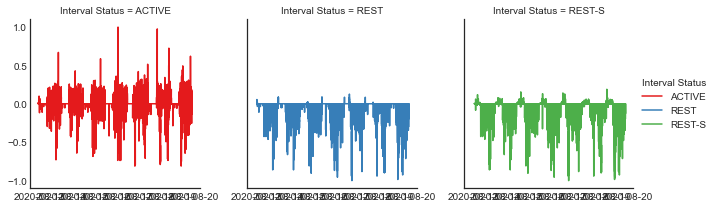





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta       phi
0  0.059267  0.599925  6.940249  6.008998  12.41973



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.073191  0.611762  6.952692  6.028808  12.291176



Subject 20142
recording period is 11 days 12:17:00
new recording period is 7 days 00:00:00
missing 9.34 percent
Correlation for raw ts: 0.36
Correlation for normalized ts: 0.36
r active 0.71, r rest -0.02, r sleep 0.00


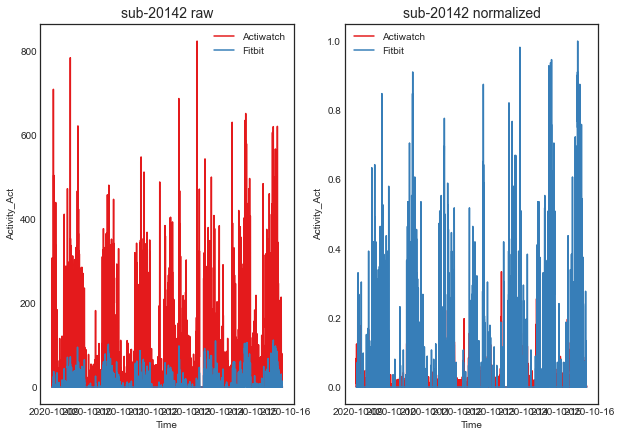

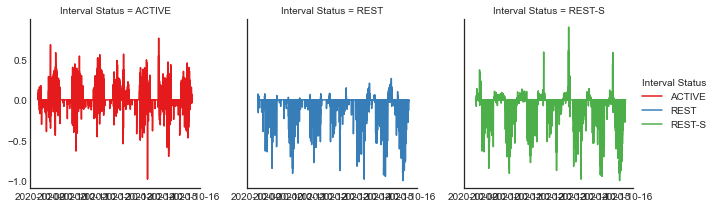





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta       phi
0  0.080811  0.606145  6.923229  5.981674  12.95635



calculating cr measures for fitbit data
     actmin       amp     alpha      beta       phi
0  0.066641  0.599912  6.922702  5.980887  13.21086



Subject 20154
recording period is 12 days 11:59:00
new recording period is 7 days 00:00:00
missing 10.78 percent
Correlation for raw ts: 0.39
Correlation for normalized ts: 0.39
r active 0.74, r rest 0.00, r sleep -0.02


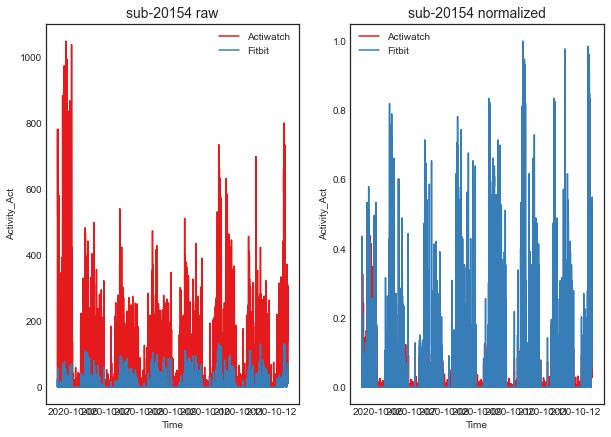

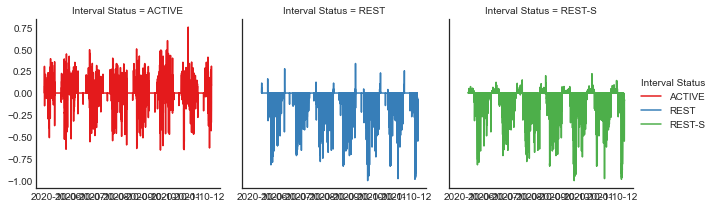





calculating cr measures for actiwatch data
     actmin       amp     alpha     beta        phi
0  0.078194  0.616666  6.956474  6.03704  11.590245



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.071972  0.621204  6.965764  6.062433  11.261233



Subject 20155
recording period is 12 days 02:57:00
new recording period is 7 days 00:00:00
missing 15.21 percent
Correlation for raw ts: 0.26
Correlation for normalized ts: 0.26
r active 0.50, r rest 0.02, r sleep 0.01


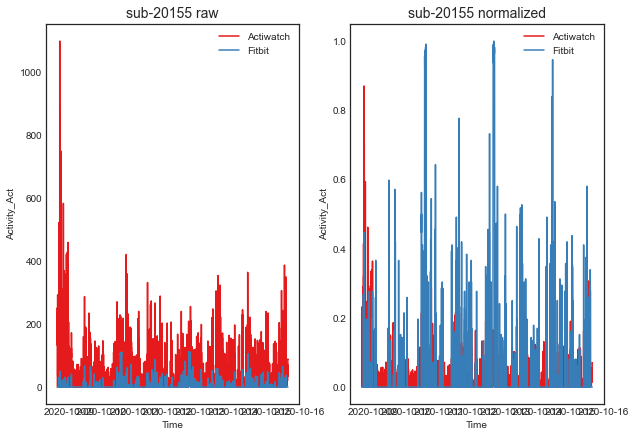

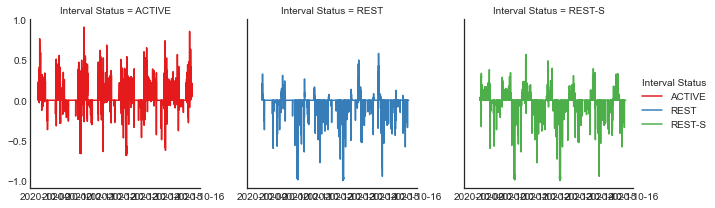





calculating cr measures for actiwatch data
     actmin       amp     alpha     beta        phi
0  0.078747  0.608359  6.932519  6.00091  12.500408



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.050553  0.605483  6.952264  6.038769  13.150859



Subject 20157
recording period is 11 days 10:05:00
new recording period is 7 days 00:00:00
missing 9.08 percent
Correlation for raw ts: 0.16
Correlation for normalized ts: 0.16
r active 0.32, r rest -0.01, r sleep -0.03


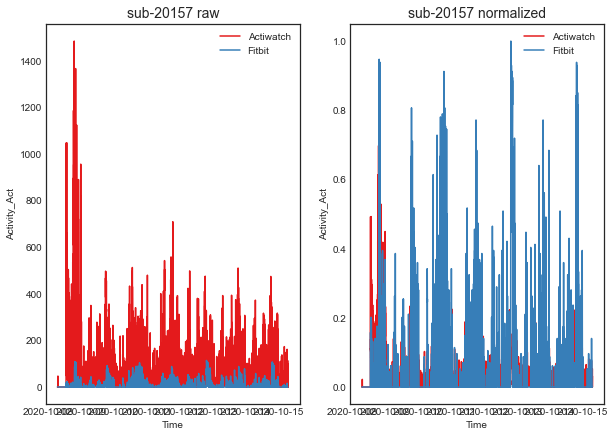

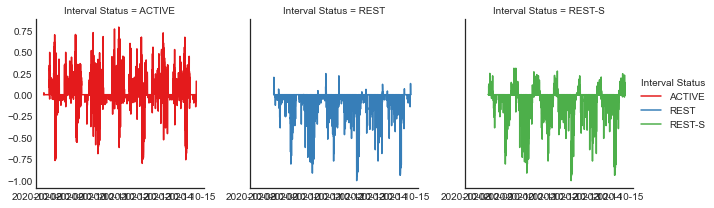





calculating cr measures for actiwatch data
    actmin       amp     alpha      beta        phi
0  0.08736  0.602643  6.906016  5.954603  12.703115



calculating cr measures for fitbit data
     actmin       amp     alpha     beta        phi
0  0.053286  0.580395  6.895642  5.93308  12.685371



Subject 20163
recording period is 6 days 03:59:00
new recording period is 7 days 00:00:00
missing 3.34 percent
Correlation for raw ts: 0.30
Correlation for normalized ts: 0.30
r active 0.63, r rest -0.00, r sleep -0.01


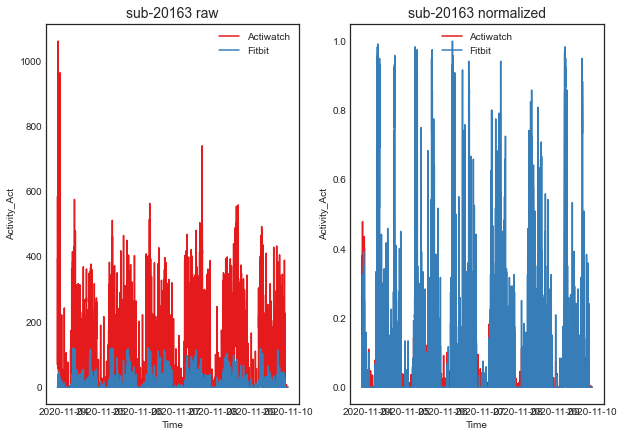

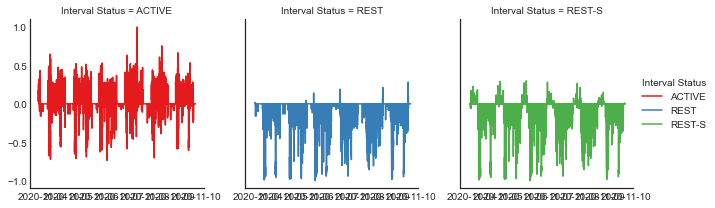





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.098124  0.619007  6.947026  6.007658  12.343157



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.085148  0.608813  6.948667  5.998753  12.160926



Subject 20168
recording period is 11 days 11:16:00
new recording period is 7 days 00:00:00
missing 1.71 percent
Correlation for raw ts: 0.27
Correlation for normalized ts: 0.27
r active 0.55, r rest -0.01, r sleep -0.02


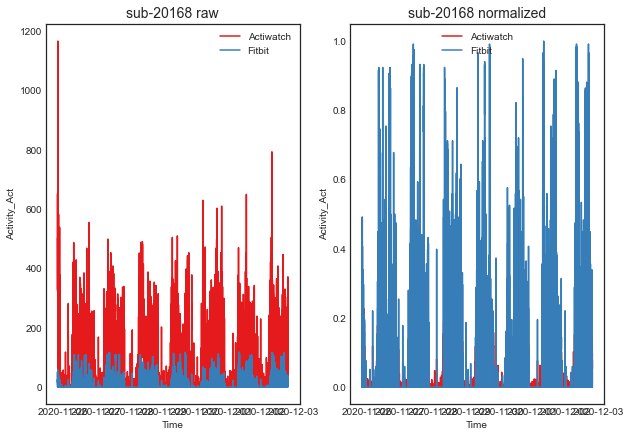

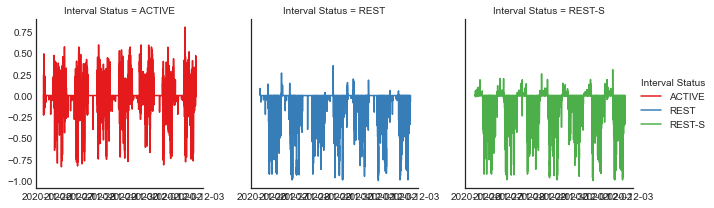





calculating cr measures for actiwatch data
     actmin      amp     alpha      beta        phi
0  0.081753  0.61331  6.950845  6.019449  12.107252



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.090218  0.629621  6.974835  6.065651  12.273126



Subject 20176
list index out of range
Subject 20177
recording period is 12 days 10:59:00
new recording period is 7 days 00:00:00
missing 3.44 percent
Correlation for raw ts: 0.28
Correlation for normalized ts: 0.28
r active 0.58, r rest -0.01, r sleep -0.06


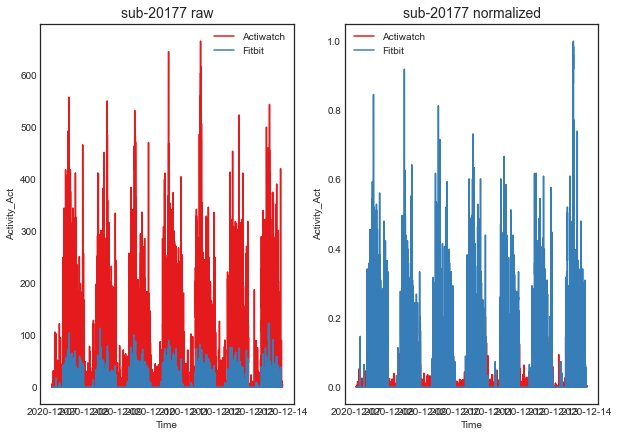

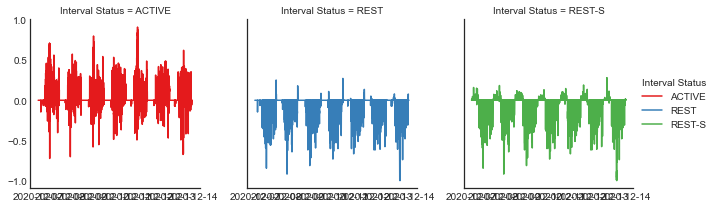





calculating cr measures for actiwatch data
     actmin      amp     alpha      beta        phi
0  0.086181  0.62404  6.949639  6.041712  12.719851



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.063037  0.613904  6.955145  6.049968  12.686616



Subject 20178
recording period is 13 days 14:06:00
new recording period is 7 days 00:00:00
missing 19.07 percent
Correlation for raw ts: 0.32
Correlation for normalized ts: 0.32
r active 0.63, r rest -0.00, r sleep -0.00


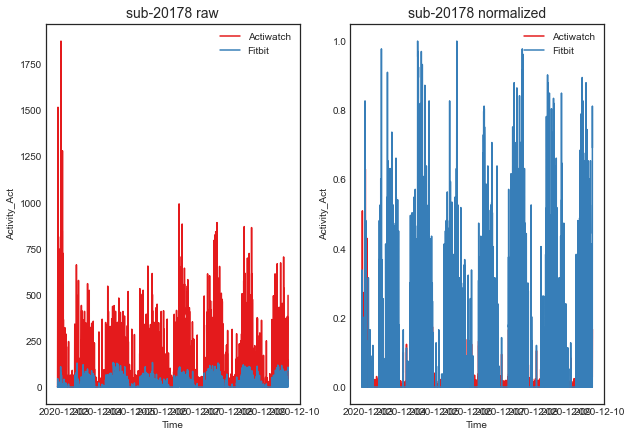

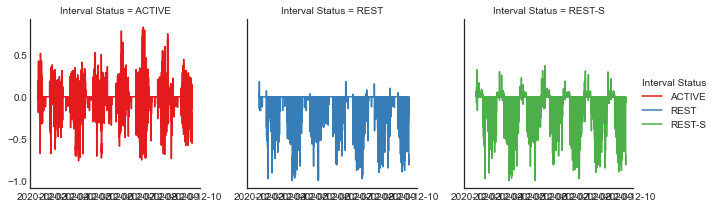





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.084858  0.621364  6.952273  6.038157  12.623634



calculating cr measures for fitbit data
     actmin       amp     alpha     beta        phi
0  0.093033  0.634047  6.961873  6.06312  12.912819



Subject 20180
recording period is 10 days 21:03:00
new recording period is 7 days 00:00:00
missing 2.83 percent
Correlation for raw ts: 0.31
Correlation for normalized ts: 0.31
r active 0.60, r rest 0.00, r sleep 0.01


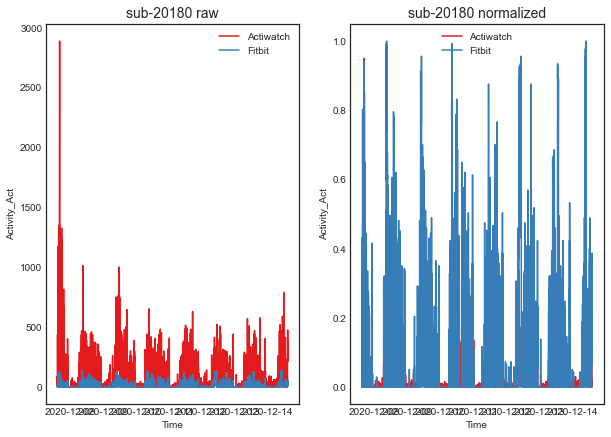

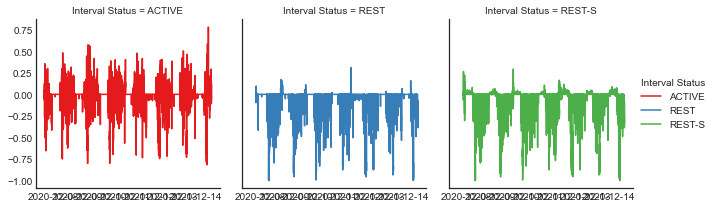





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.069207  0.613722  6.956402  6.043272  12.256438



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.088926  0.634071  6.976085  6.080516  12.016319



Subject 20181
recording period is 11 days 04:49:00
new recording period is 7 days 00:00:00
missing 3.08 percent
Correlation for raw ts: 0.42
Correlation for normalized ts: 0.42
r active 0.76, r rest 0.00, r sleep 0.00


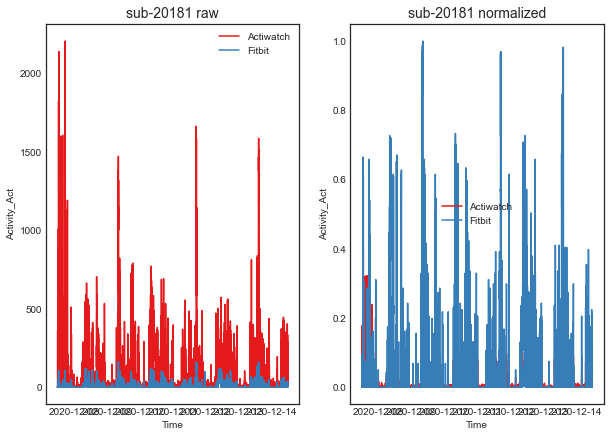

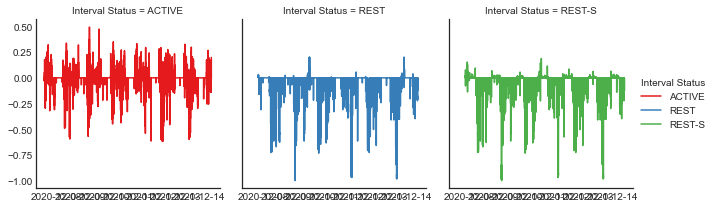





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.054703  0.598033  6.952871  6.016878  12.258202



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.073031  0.618809  6.975168  6.061366  12.031897



Subject 20182
recording period is 11 days 13:46:00
new recording period is 7 days 00:00:00
missing 18.88 percent
Correlation for raw ts: 0.25
Correlation for normalized ts: 0.25
r active 0.47, r rest -0.01, r sleep -0.03


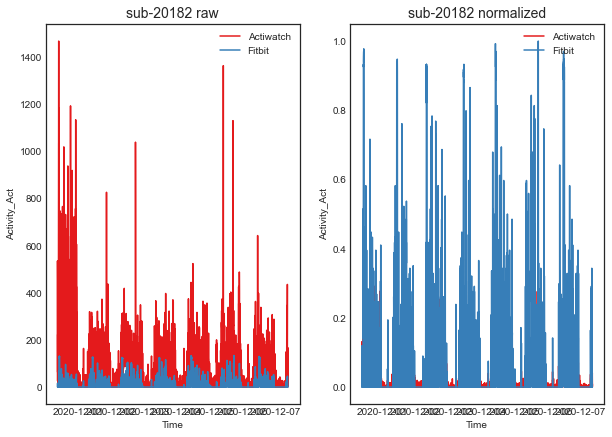

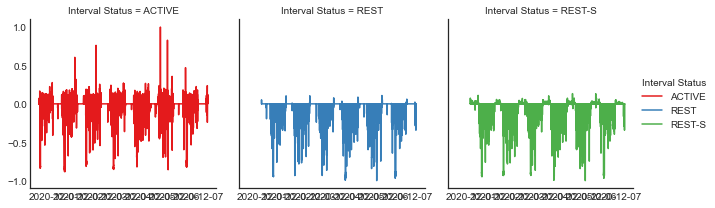





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.042175  0.590546  6.942005  6.007744  12.167797



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.079675  0.634287  6.967094  6.091185  11.880803



Subject 20184
recording period is 11 days 05:05:00
new recording period is 7 days 00:00:00
missing 33.95 percent
Correlation for raw ts: 0.21
Correlation for normalized ts: 0.21
r active 0.43, r rest -0.02, r sleep 0.00


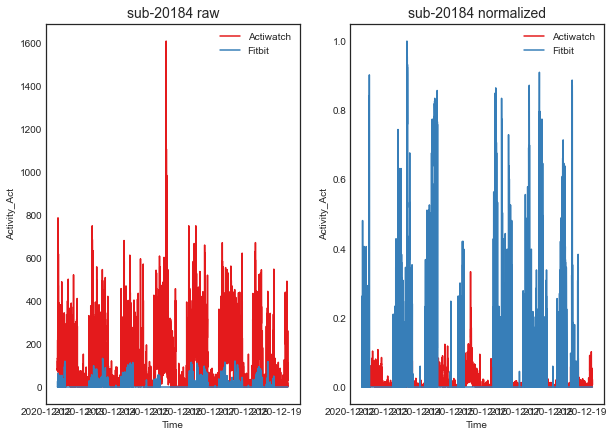

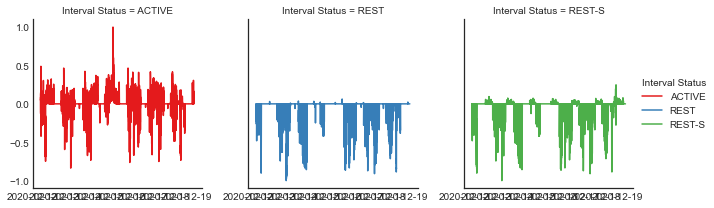





calculating cr measures for actiwatch data
     actmin       amp     alpha      beta        phi
0  0.060197  0.602124  6.948445  6.018556  12.293403



calculating cr measures for fitbit data
     actmin       amp     alpha      beta        phi
0  0.068112  0.617237  6.959464  6.055673  12.337897





In [27]:
cordf = []
cr = pd.DataFrame()
npar = pd.DataFrame()
group_dict = {}

for file in act_files:
    try:
        subject = file.split('actiwatch/')[1][0:5]
        print('Subject %s' % subject)
        group_dict[subject] = {}

        act = readact_raw(file)
        act['Time'] = pd.to_datetime(act['Date'] + ' ' + act['Time'])
        act = act.set_index('Time')
        act = act.groupby(['Interval Status']).resample('1T').sum().reset_index().set_index('Time')[['Activity', 'Interval Status']]

        fit_file = list(filter(lambda x: subject in x, fit_files))[0]
        hr_file = list(filter(lambda x: subject in x, hr_files))[0]

        hr = pd.read_csv(hr_file, index_col='Time', parse_dates=True)


        if len(fit_file) != 0:
            fit = pd.read_csv(fit_file, header=None, names = ['Time', 'Activity'], skiprows=1) #this wont work bc is preproc file
            fit['Time'] = pd.to_datetime(fit['Time'])

            # set missing activity values to na instead of 0 based on hr data
            fit = pd.merge(fit, hr, on='Time')
            fit['Activity'][fit['Value'] == 0] = np.nan

            fit = fit.set_index(fit['Time'])
            fit = fit.resample('1T').sum()

            df = act.join(fit, how = 'outer', lsuffix='_Act', rsuffix='_Fit').dropna(subset=['Activity_Act'])

            # eliminate time points with missing fitbit values at the beginning & end
            first_idx = df['Activity_Fit'].first_valid_index()
            last_idx = df['Activity_Fit'].last_valid_index()
            df = df.loc[first_idx:last_idx]

            print('recording period is %s' % (last_idx - first_idx))
            group_dict[subject]['raw'] = df

            # truncate to first n days
            last_idx_n = first_idx + dt.timedelta(days=n_days)
            df = df.loc[first_idx:last_idx_n]
            group_dict[subject][str(n_days)] = df
            
            print('new recording period is %s' % (last_idx_n - first_idx))

            # calculate percent missing
            missing = (hr['Value'].diff(5) == 0).sum()/len(hr['Value'])
            print('missing %.2f percent' % (missing * 100))

            # interpolate
            if interpolate == True:
                df['Activity_Fit'].interpolate(method='linear', limit=10, inplace=True)
            group_dict[subject][str(n_days) + '+interpolated'] = df
            
            # correlation
            r = df[['Activity_Act', 'Activity_Fit']].corr().iloc[0::2,-1][0]
            print('Correlation for raw ts: %.2f' % r)

            #normalized data 
            scaler = MinMaxScaler()
            df_norm = df.copy()
            df_norm[['Activity_Act', 'Activity_Fit']] = scaler.fit_transform(df_norm[['Activity_Act', 'Activity_Fit']])
            group_dict[subject]['preproc+norm'] = df_norm
            
            # correlation
            r_preproc = df_norm[['Activity_Act', 'Activity_Fit']].corr().iloc[0::2,-1][0]
            print('Correlation for normalized ts: %.2f' % r_preproc)

            # correlation by interval type
            r_active, r_rest, r_sleep = df_norm.groupby('Interval Status')[['Activity_Act', 'Activity_Fit']].corr().iloc[0::2,-1].to_list()
            print('r active %.2f, r rest %.2f, r sleep %.2f' % (r_active, r_rest, r_sleep))

            cordf.append([subject, missing, r, r_preproc, r_active, r_rest, r_sleep])
            group_dict[subject]['correlations'] = [subject, missing, r, r_preproc, r_active, r_rest, r_sleep]
            
            # save results
            np.save(results_dir + 'group_results.npy', group_dict)
            np.save(results_dir + '%s_results.npy' % subject, group_dict[subject])
            
            # plot raw and normalized ts
            fig, axes = plt.subplots(1,2, figsize=(10,7))

            sns.lineplot(x = 'Time', y = 'Activity_Act', data = df.reset_index(), label = 'Actiwatch', ci=None ,ax = axes[0])
            sns.lineplot(x = 'Time', y = 'Activity_Fit', data = df.reset_index(), label = 'Fitbit', ci=None, ax = axes[0])
            axes[0].set_title('sub-%s raw' % subject, fontsize = 14)

            sns.lineplot(x = 'Time', y = 'Activity_Act', data = df_norm.reset_index(), label = 'Actiwatch', ci=None, ax = axes[1])
            sns.lineplot(x = 'Time', y = 'Activity_Fit', data = df_norm.reset_index(), label = 'Fitbit', ci=None, ax = axes[1])
            axes[1].set_title('sub-%s normalized' % subject, fontsize = 14)

            plt.show()

            # plot ts by interval type
            df_norm['Act-Fit'] = df_norm['Activity_Act'] - df_norm['Activity_Fit']
            g = sns.FacetGrid(df_norm.reset_index(), col="Interval Status", hue="Interval Status")
            g.map_dataframe(sns.lineplot, x="Time", y="Act-Fit", ci=None, palette = 'Set1')
            g.add_legend()

            plt.show()
            plt.close()

            print('\n\n\n')
            
            # calculate cosinor cr measures
            print('calculating cr measures for actiwatch data')
            group_dict[subject]['cosinor_act'] = fitcosinor.fitcosinor(df_norm.rename(columns = {'Activity_Act':'Activity'})['Activity'], transform = 'antilogistic')[0]
            group_dict[subject]['cosinor_act']['subject'] = subject
            group_dict[subject]['cosinor_act']['device'] = 'Actiwatch'
            
            cr = cr.append(group_dict[subject]['cosinor_act'])
            np.save(results_dir + '%s_results.npy' % subject, group_dict[subject])
            
            # calculate non-parametric cr measures
            group_dict[subject]['nonpar_act'] = pd.DataFrame(npmetrics.np_metrics_all(df_norm.rename(columns = {'Activity_Act':'Activity'})['Activity'])).transpose()
            group_dict[subject]['nonpar_act'].columns = np_measures
            group_dict[subject]['nonpar_act']['subject'] = subject
            group_dict[subject]['nonpar_act']['device'] = 'Actiwatch'
            
            npar = npar.append(group_dict[subject]['nonpar_act'])
            np.save(results_dir + '%s_results.npy' % subject, group_dict[subject])
            
            
            print('\n\n')
            
            # calculate cosinor cr measures
            print('calculating cr measures for fitbit data')
            group_dict[subject]['cosinor_fit'] = fitcosinor.fitcosinor(df_norm.rename(columns = {'Activity_Fit':'Activity'})['Activity'], transform = 'antilogistic')[0]
            group_dict[subject]['cosinor_fit']['subject'] = subject
            group_dict[subject]['cosinor_fit']['device'] = 'Fitbit'
            
            cr = cr.append(group_dict[subject]['cosinor_fit'])
            np.save(results_dir + '%s_results.npy' % subject, group_dict[subject])
        
            # calculate non-parametric cr measures
            group_dict[subject]['nonpar_fit'] = pd.DataFrame(npmetrics.np_metrics_all(df_norm.rename(columns = {'Activity_Fit':'Activity'})['Activity'])).transpose()
            group_dict[subject]['nonpar_fit'].columns = np_measures
            group_dict[subject]['nonpar_fit']['subject'] = subject
            group_dict[subject]['nonpar_fit']['device'] = 'Fitbit'
            
            npar = npar.append(group_dict[subject]['nonpar_fit'])
            
            np.save(results_dir + '%s_results.npy' % subject, group_dict[subject])
            
            np.save(results_dir + 'group_results.npy', group_dict)
            

            print('\n\n')
            
        else:
            print('no matching fitbit file')
    
    except Exception as e:
        print(e)

pd.DataFrame(cordf, columns = ['subject', 'missing_percent', 'r', 'r_preproc', 'r_active', 'r_rest', 'r_sleep']).to_csv(results_dir + 'ts_correlations.csv', index=None)

cr.columns = group_dict[subject]['cosinor_fit'].columns
cr = cr.set_index('subject')

npar.columns = group_dict[subject]['nonpar_fit'].columns
npar = npar.set_index('subject')

cr.to_csv(results_dir + 'cr_cosinor_df.csv')
npar.to_csv(results_dir + 'cr_nonpar_df.csv')